In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [2]:
df = pd.read_csv("cancer_patient_datasets.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df = df.drop(columns=['index', 'Patient Id'])
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [5]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

print('Cancer Levels: ', df['Level'].unique())
map = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(map, inplace=True)
print('Cancer Levels: ', df['Level'].unique())

In [6]:
# transform levels to int ( fit_transform gives value 1 = low, 2 = medium, 0 = high)

# use rename to reorder
df.Level = df.Level.replace("Low", 0)
df.Level = df.Level.replace("Medium", 1)
df.Level = df.Level.replace("High", 2)

df.Level = df.Level.astype("int64")
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


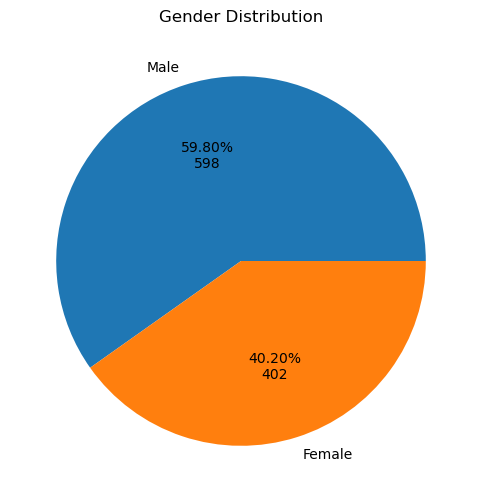

In [7]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(),
        labels = ["Male", "Female"],
        autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df['Gender'].value_counts()) / 100))
plt.title('Gender Distribution')
plt.savefig('pie.png')
plt.show()

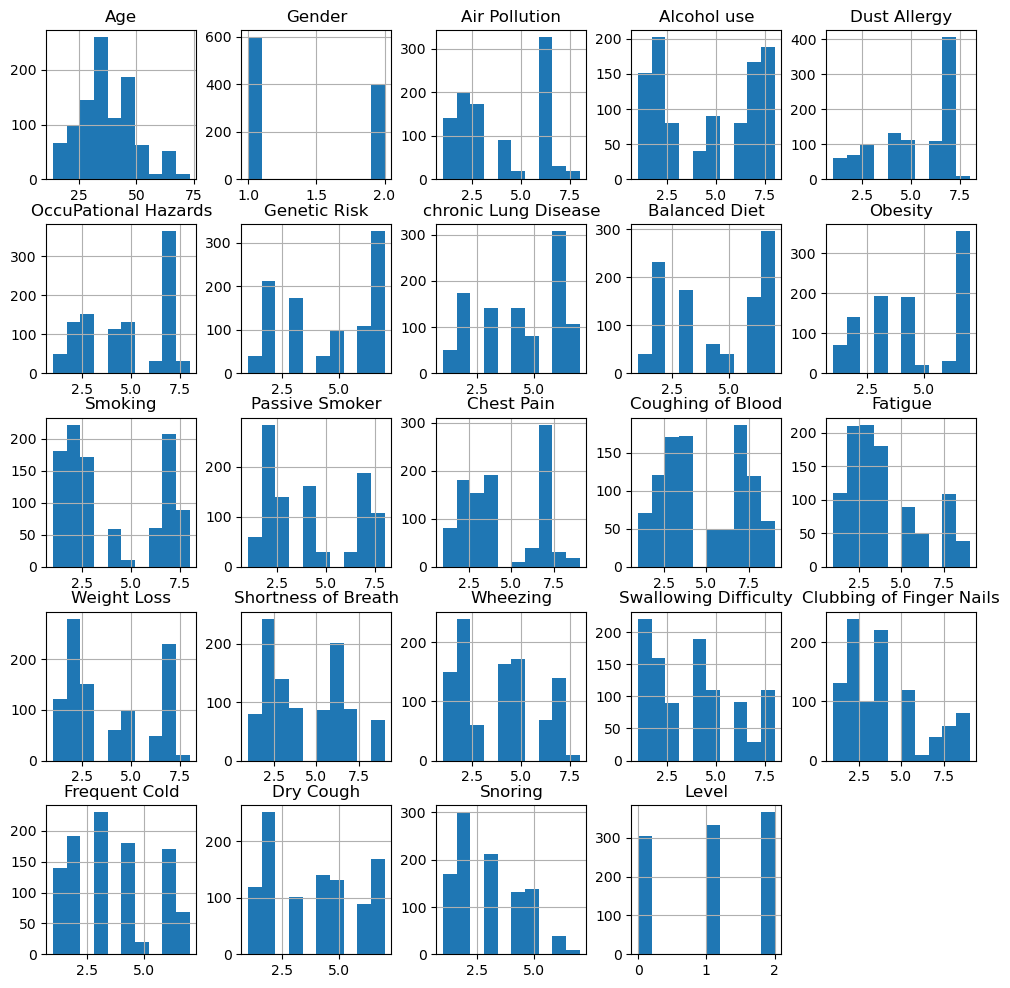

In [8]:
df.hist(figsize=(12,12))
plt.show()

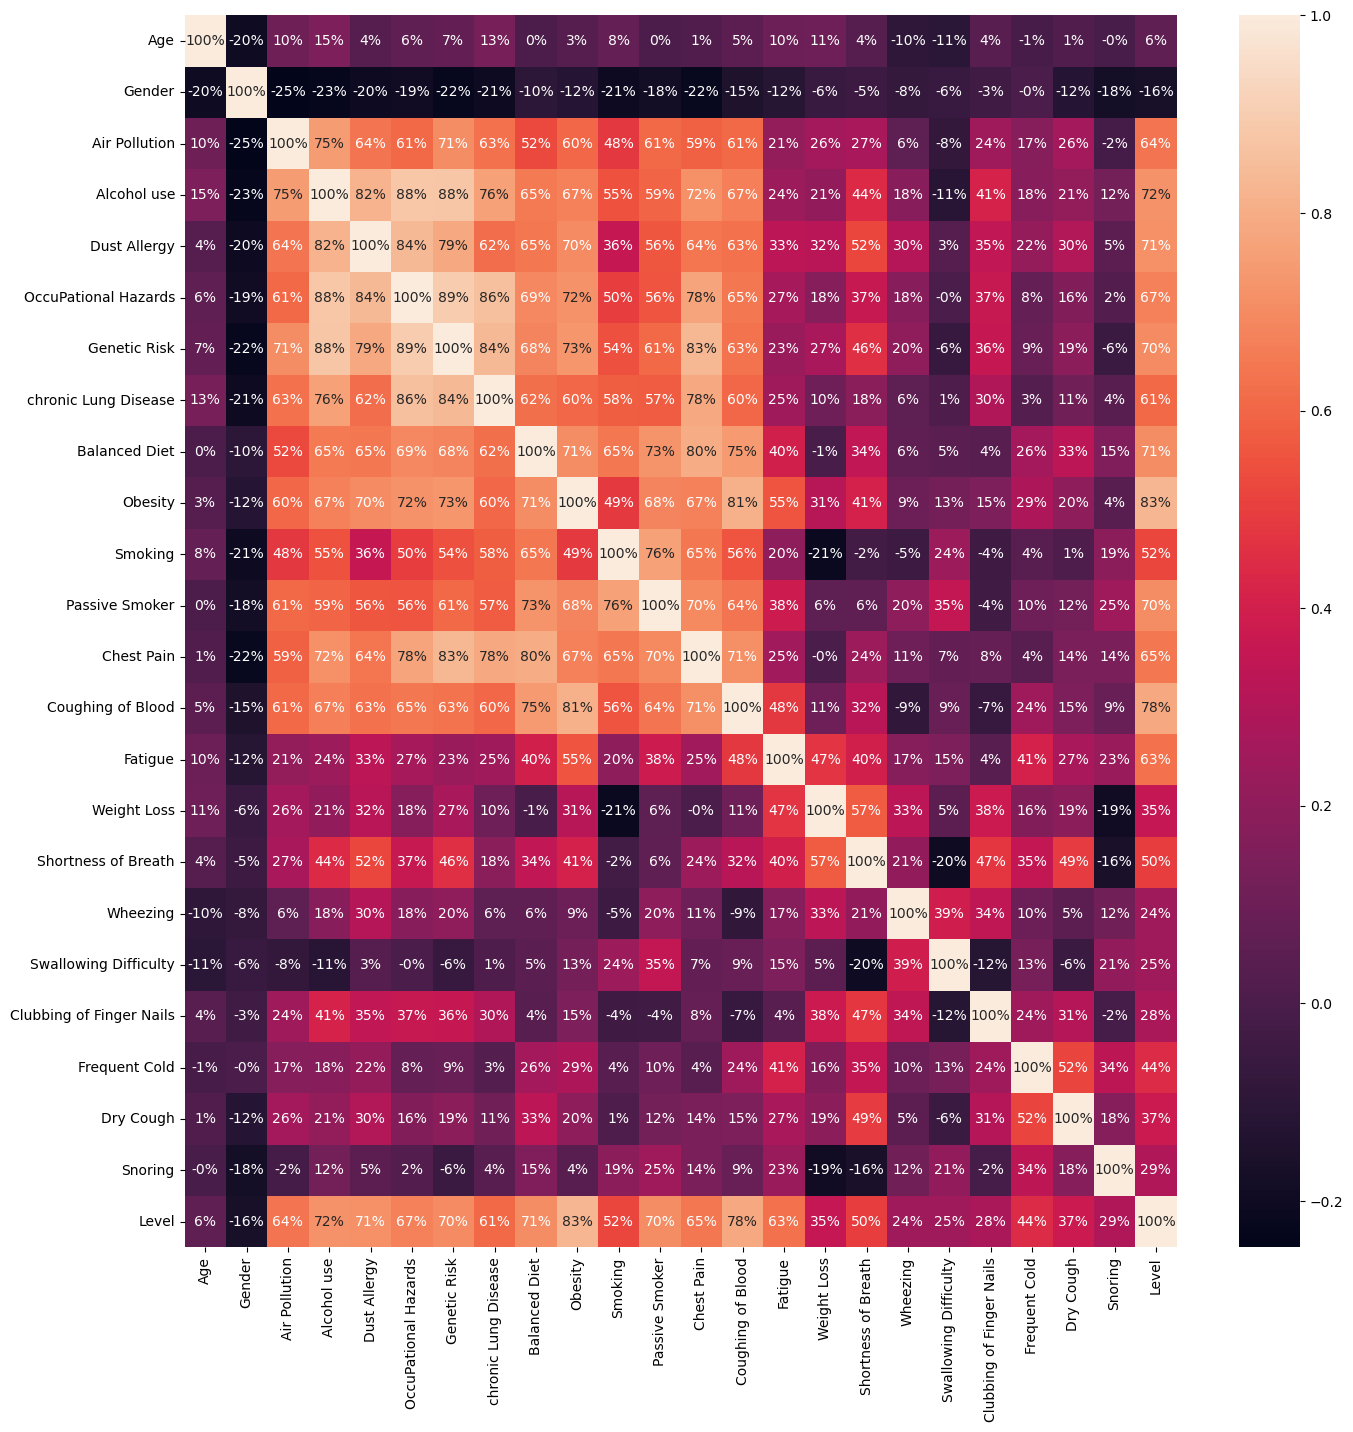

In [9]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.savefig('heatmap.png')
plt.show()

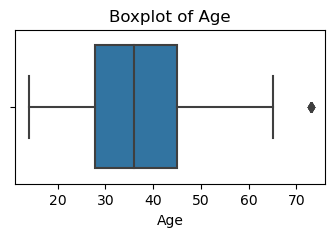

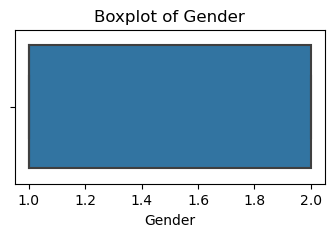

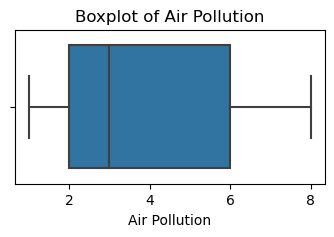

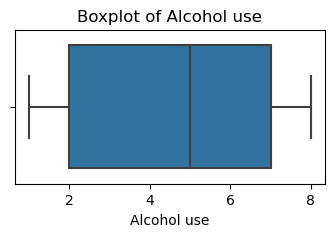

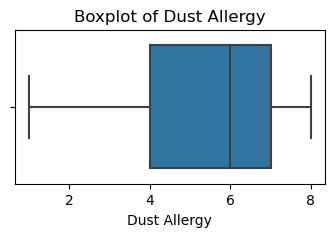

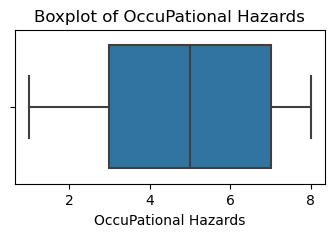

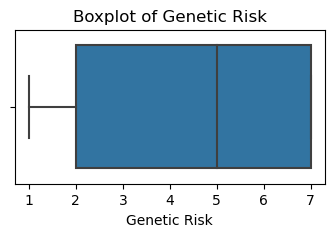

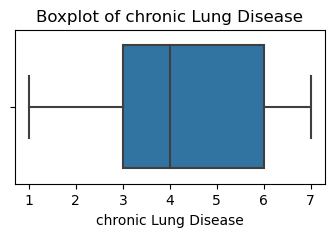

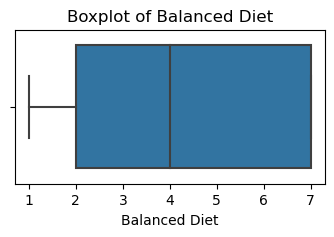

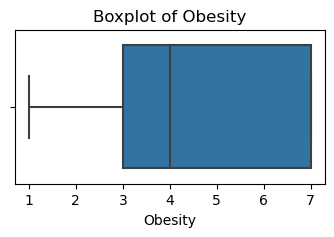

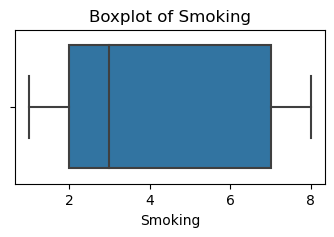

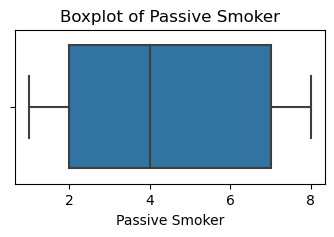

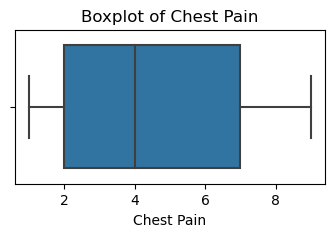

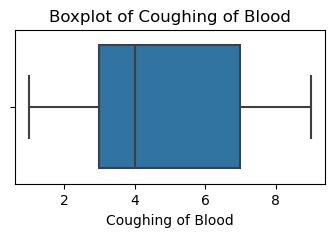

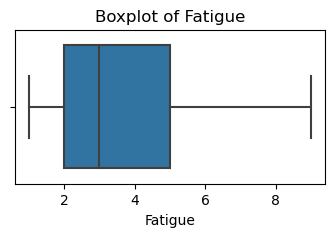

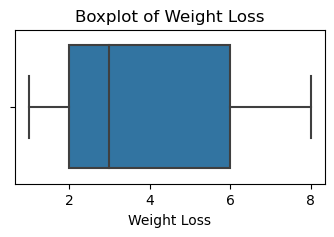

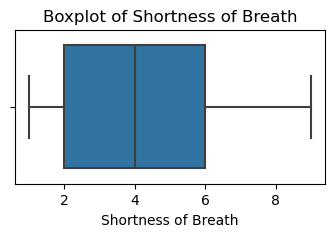

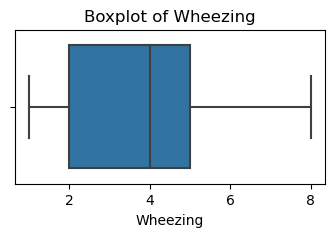

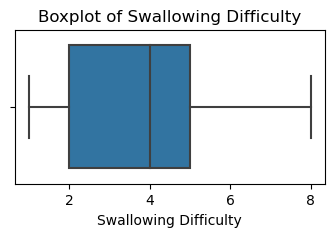

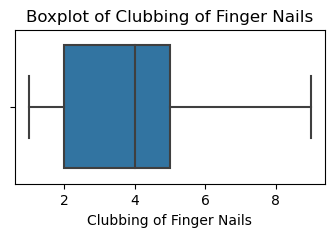

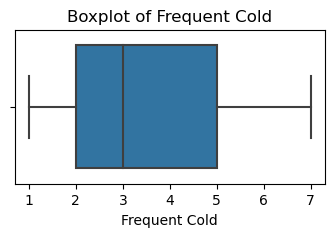

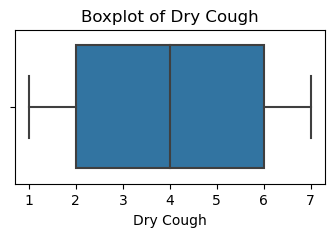

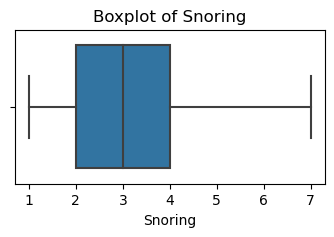

In [10]:
# Create boxplots to show any outliers
boxplot_df = df.drop('Level', axis = 1)
for column in boxplot_df:
  plt.figure(figsize=(4, 2))
  sns.boxplot(x=boxplot_df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

Models

In [11]:
df['Level'].value_counts()

Level
2    365
1    332
0    303
Name: count, dtype: int64

In [17]:
# Separate the Features (X) from the Target (y)

X=df.drop('Level',axis=1)

y=df['Level'].values

In [18]:
# split the data into testing and training sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=78)

Logistic regression without scaling 

In [19]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_reg = LogisticRegression(solver='liblinear', max_iter=400, random_state=1)

In [20]:
#  Fit (train) or model using the training data
logistic_model = logistic_reg.fit(X_train, y_train)

In [21]:
#Generate testing predictions
testing_prediction = logistic_reg.predict(X_test)
pd.DataFrame({"Prediction": testing_prediction, "Actual": y_test})

#Generate training predictions
training_prediction = logistic_model.predict(X_train)
pd.DataFrame({"Prediction": training_prediction, "Actual": y_train})

,Prediction,Actual
0,0,0
1,0,0
2,2,2
3,0,0
4,0,0
...,...,...
745,2,2
746,0,0
747,2,2
748,1,1


In [22]:
# Generate a confusion matrix for the testing data
testing_matrix = confusion_matrix(y_test, testing_prediction)

print(testing_matrix)

[[72  0  0]
 [ 4 82  0]
 [ 0  0 92]]


In [23]:
# Create a confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_prediction)

# Print the confusion matrix for the training data
print(training_matrix)

[[231   0   0]
 [ 10 236   0]
 [  0   0 273]]


In [24]:
# Print the classification report for the testing model
testreport = classification_report(y_test, testing_prediction)
accuracy_lr = accuracy_score(y_test, testing_prediction)
print(testreport)
print("Accuracy score is ", accuracy_lr)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.95      0.98        86
           2       1.00      1.00      1.00        92

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

Accuracy score is  0.984


In [25]:
# Print the classification report for the training model
trainreport = classification_report(y_train, training_prediction)
print(trainreport)
accuracy_train = accuracy_score(y_train, training_prediction)
print("Accuracy score is ", accuracy_train)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       231
           1       1.00      0.96      0.98       246
           2       1.00      1.00      1.00       273

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

Accuracy score is  0.9866666666666667


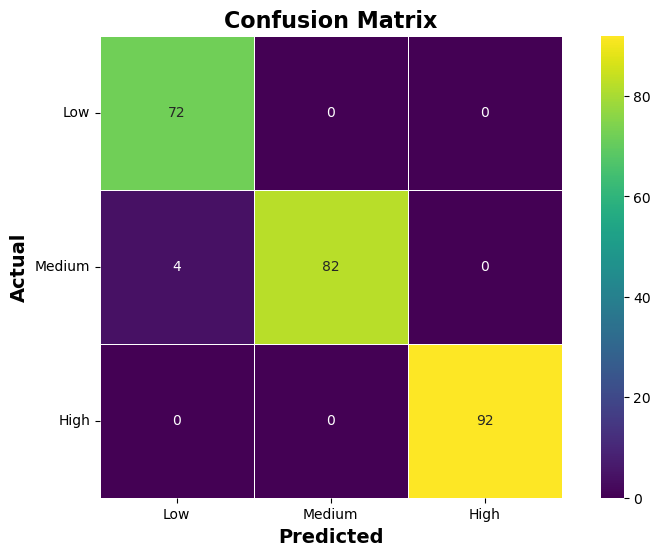

In [26]:
cm = confusion_matrix(y_test, testing_prediction)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

Logistic regression with scaled data

In [27]:
# scale the data 
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [28]:
# apply logistic regression to the scale data
log_reg_scaled = LogisticRegression(solver='liblinear', random_state=42)
log_reg_scaled.fit(X_train_scaled, y_train)
y_pred_standard = log_reg_scaled.predict(X_test_scaled)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
print("Accuracy with Standard scaling:", accuracy_standard)

Accuracy with Standard scaling: 0.976


Random Forest Classifier

In [29]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [30]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [31]:
# Making predictions using the testing data
predictions_rf = rf_model.predict(X_test_scaled)

In [32]:
# create a confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
cm_rf

array([[72,  0,  0],
       [ 0, 86,  0],
       [ 0,  0, 92]], dtype=int64)

In [33]:
print(classification_report(y_test, predictions_rf))
# Calculating the accuracy score
acc_score_rf = accuracy_score(y_test, predictions_rf)
print("Accuracy with random forest classifier:", acc_score_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        92

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Accuracy with random forest classifier: 1.0


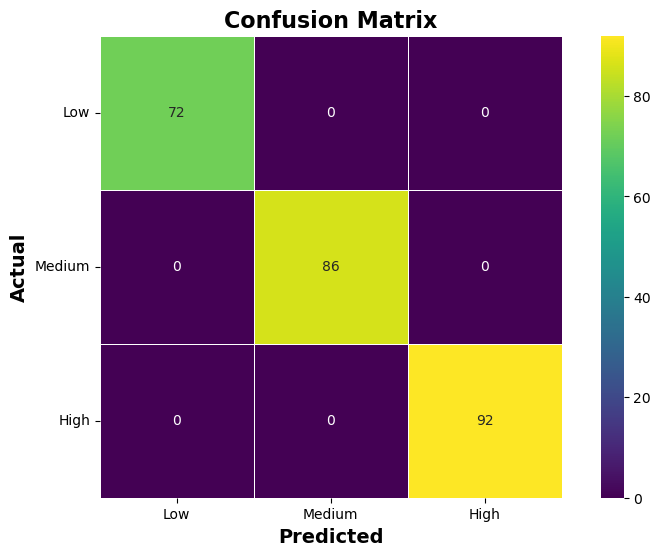

In [34]:
cm = confusion_matrix(y_test, predictions_rf)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

In [35]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10774866682308047, 'Obesity'),
 (0.1043546159527646, 'Coughing of Blood'),
 (0.09353433850854237, 'Wheezing'),
 (0.09182012719690186, 'Passive Smoker'),
 (0.06200865594225974, 'Fatigue'),
 (0.05341606974589456, 'Balanced Diet'),
 (0.05189954465621297, 'Alcohol use'),
 (0.04151423181992963, 'Shortness of Breath'),
 (0.038696575227073725, 'Smoking'),
 (0.03822757121899644, 'Dust Allergy'),
 (0.03654645581541872, 'Air Pollution'),
 (0.03604383620016289, 'Swallowing Difficulty'),
 (0.034705182752057306, 'Clubbing of Finger Nails'),
 (0.03402383286342143, 'Snoring'),
 (0.02874393164765327, 'OccuPational Hazards'),
 (0.02861631630045619, 'Genetic Risk'),
 (0.02831874858760664, 'Chest Pain'),
 (0.027031442705976006, 'Frequent Cold'),
 (0.022879322668913845, 'Weight Loss'),
 (0.018328375217719885, 'chronic Lung Disease'),
 (0.014640407645264124, 'Dry Cough'),
 (0.006550813891647044, 'Age'),
 (0.0003509366120465224, 'Gender')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

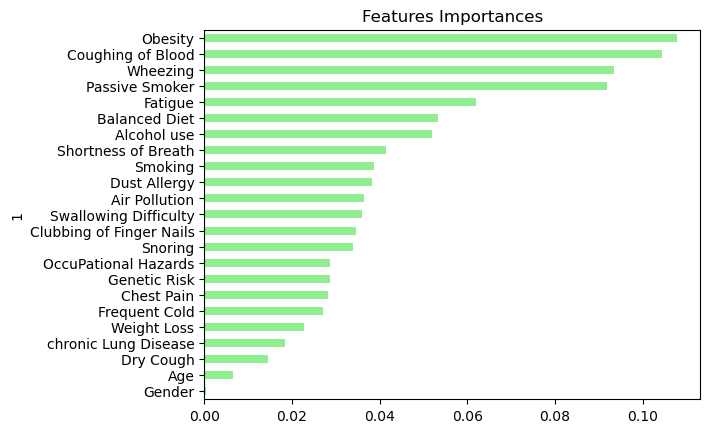

In [36]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Decision tree model

In [37]:
# Creating the decision tree classifier instance
dtc = DecisionTreeClassifier()

In [38]:
# Fitting the model
dtc_model = dtc.fit(X_train_scaled, y_train)

In [39]:
# Making predictions using the testing data
dtc_predictions = dtc_model.predict(X_test_scaled)

In [40]:
# creating a confusion matrix
cm_dtc = confusion_matrix(y_test, dtc_predictions)
cm_dtc

array([[72,  0,  0],
       [ 0, 86,  0],
       [ 0,  0, 92]], dtype=int64)

In [41]:
print(classification_report(y_test, dtc_predictions))
# Calculating the accuracy score
acc_score_dtc = accuracy_score(y_test, dtc_predictions)
print("Accuracy with decision tree classifier:", acc_score_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        92

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Accuracy with decision tree classifier: 1.0


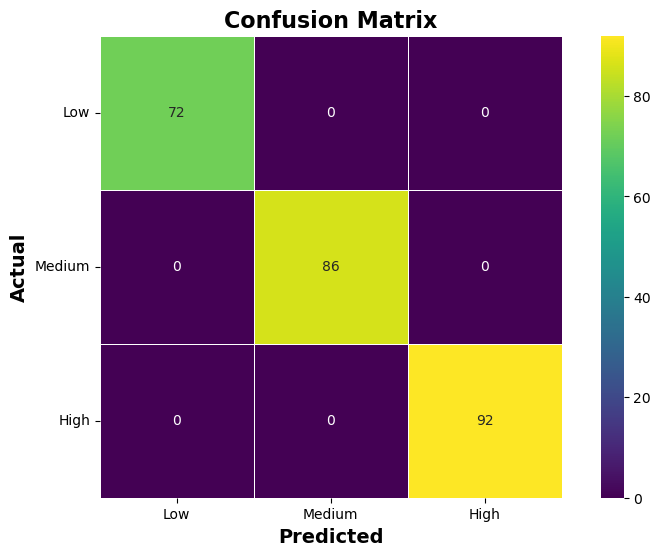

In [42]:
cm = confusion_matrix(y_test, dtc_predictions)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

KNN model

In [43]:
# Instantiate the model with k = 3 neighbours
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
 # Train the model
knn_model = knn.fit(X_train_scaled, y_train)

In [45]:
# Create predictions
knn_predictions = knn_model.predict(X_test_scaled)
knn_predictions

C:\Users\Drish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Drish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


array([1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0,
       2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2,
       1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2,
       2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0,
       1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1,
       0, 1, 0, 2, 2, 0, 1, 2], dtype=int64)

In [46]:
# creating a confusion matrix
cm_knn = confusion_matrix(y_test, knn_predictions)
cm_knn

array([[72,  0,  0],
       [ 0, 86,  0],
       [ 0,  0, 92]], dtype=int64)

In [47]:
print(classification_report(y_test, knn_predictions))
# Calculating the accuracy score
acc_score_knn = accuracy_score(y_test, knn_predictions)
print("Accuracy with decision tree classifier:", acc_score_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        92

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Accuracy with decision tree classifier: 1.0


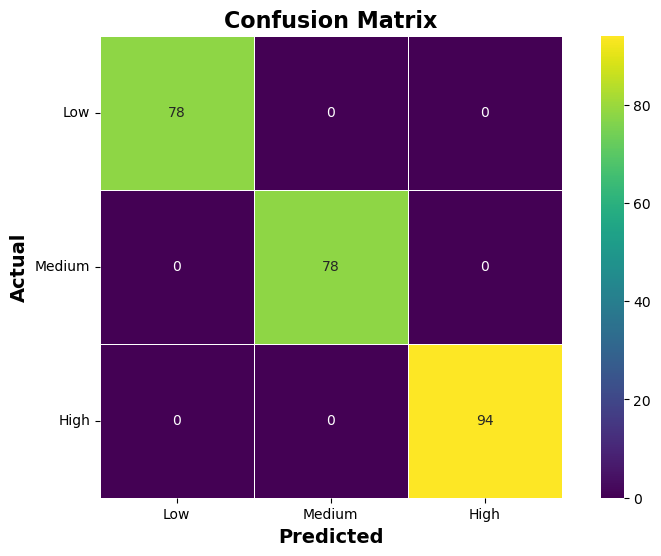

In [46]:
cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

Neural network

In [66]:
df.Level = df.Level.replace("Low", 0)
df.Level = df.Level.replace("Medium", 1)
df.Level = df.Level.replace("High", 2)

df.Level = df.Level.astype("int64")

X = df.drop("Level", axis = 1)
y = pd.get_dummies(df["Level"])

In [67]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [68]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [74]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  30
hidden_nodes_layer2 = 20

nn1 = tf.keras.models.Sequential()

In [75]:
# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check the structure of the model
nn1.summary()

C:\Users\Drish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,403 (5.48 KB)

 Trainable params: 1,403 (5.48 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Compile the model
nn1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (750, 23)
X_test shape: (250, 23)


In [77]:
# Train the model use the callback
fit_model = nn1.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5597 - loss: 0.8698   
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8640 - loss: 0.5153 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9373 - loss: 0.3265 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.2346 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.1690 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.1212
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9707 - loss: 0.1036
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0695 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.0598 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9918 - loss: 0.0441 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9899 - loss: 0.0342 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [78]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - 27ms/step - accuracy: 1.0000 - loss: 1.4896e-04
Loss: 0.00014896172797307372, Accuracy: 1.0


In [79]:
# Export our model to HDF5 file
# Define the file path for saving the model
filepath = "LungCancer.h5"

# Save the model to HDF5 format
nn1.save(filepath)